Number of rows after merge: 1969
       GEOID10       SF               CF  DF_PFS  AF_PFS  HDF_PFS  DSF_PFS  \
0  13135050709  Georgia  Gwinnett County    0.68    0.54     0.27     0.59   
1  13135050314  Georgia  Gwinnett County    0.43    0.16     0.10     0.89   
2  13135050315  Georgia  Gwinnett County    0.33    0.27     0.12     0.89   
3  13135050415  Georgia  Gwinnett County    0.75    0.14     0.60     0.72   
4  13135050425  Georgia  Gwinnett County    0.43    0.06     0.35     0.74   

   EBF_PFS  EALR_PFS  EBLR_PFS  ...  BLR_NHR  Flood  Fld_90_LI  Fire  \
0     0.61      0.61      0.51  ...     51.0   59.0      False  33.0   
1     0.59      0.36      0.56  ...     56.0   45.0      False  33.0   
2     0.44      0.44      0.55  ...     55.0   25.0      False  33.0   
3     0.72      0.26      0.51  ...     51.0   42.0      False  33.0   
4     0.32      0.51      0.53  ...     53.0   37.0      False  33.0   

   Fire_90_LI  Flood_90  Fire_90  BLR_abs  Fld_abs  Fire_abs  
0 

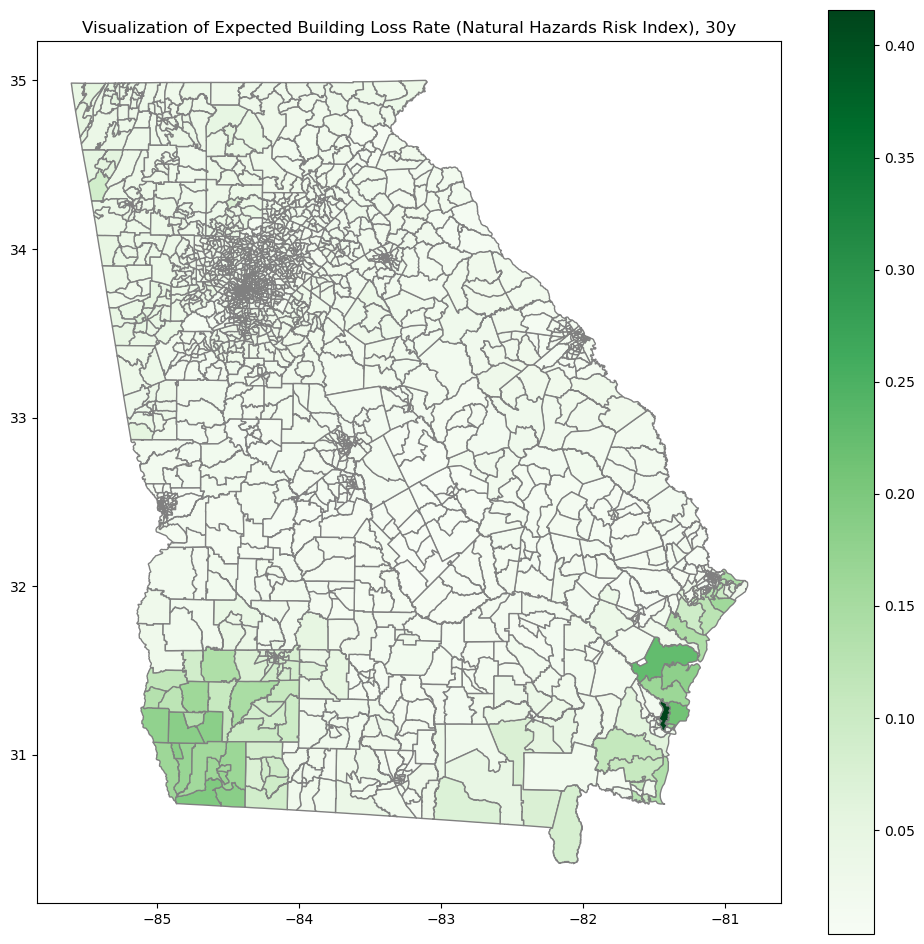

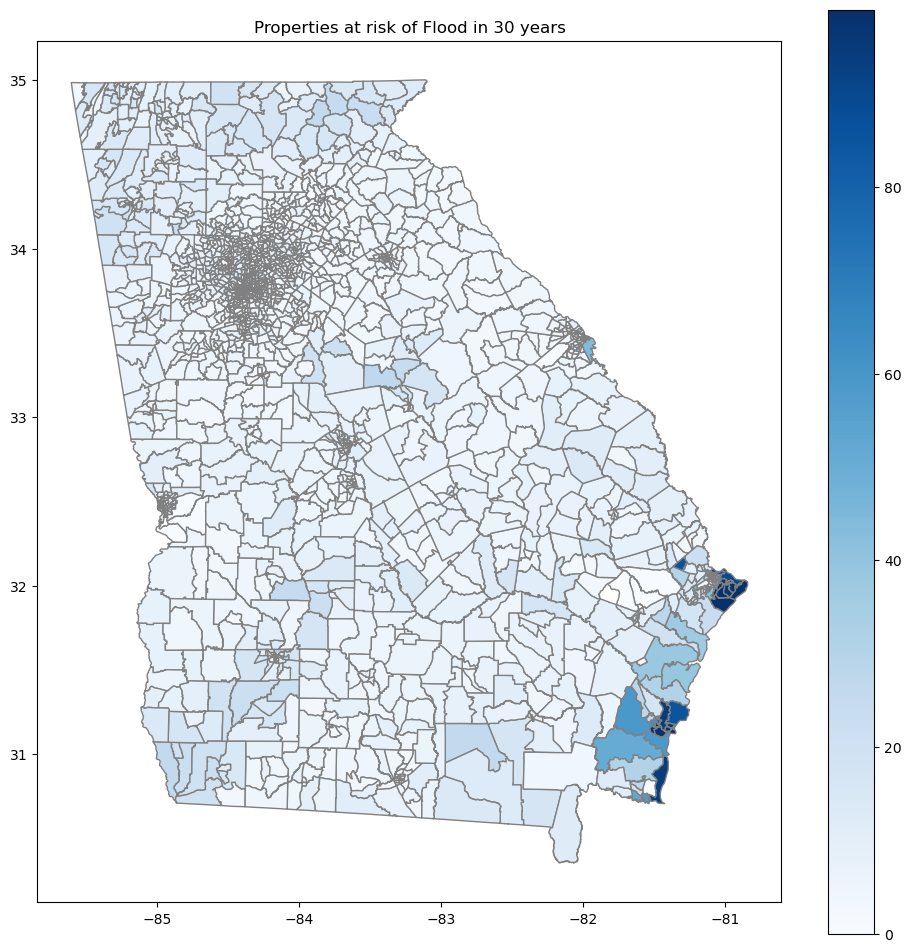

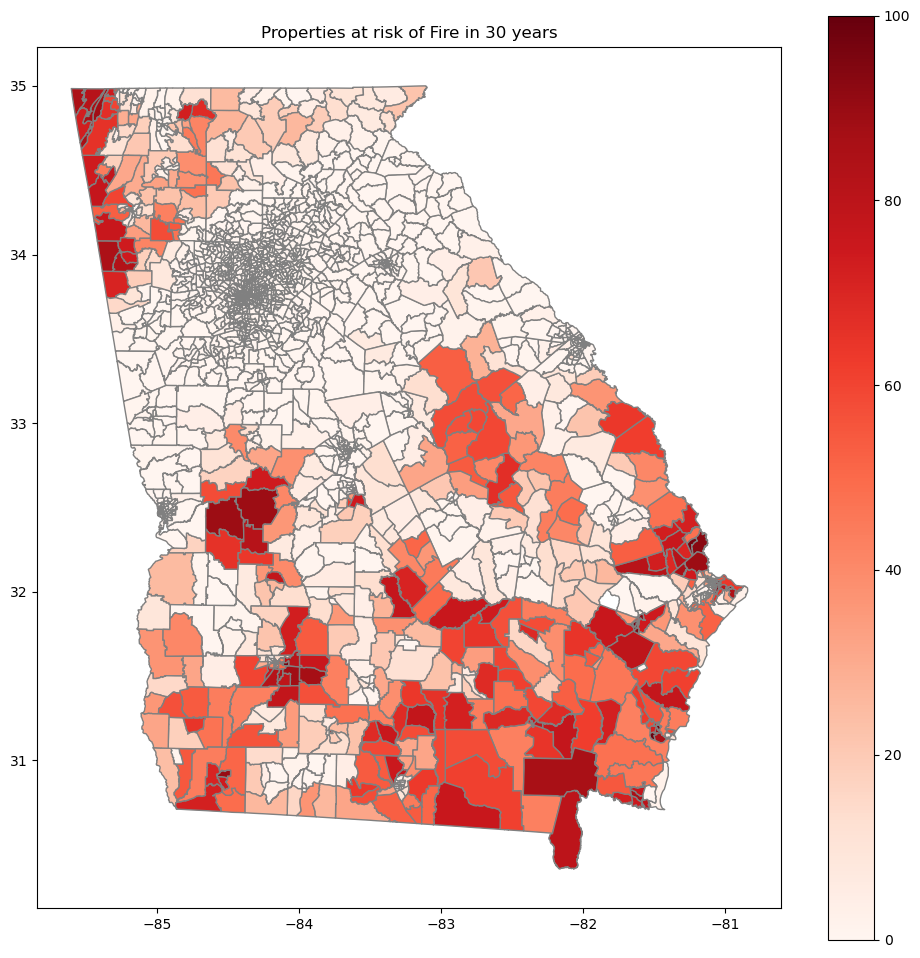

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Shapefile and CSV data
# Purpose: Merging geographic data (shapefile) with attribute data (CSV) containing hazard information for each census tract in Georgia.

# File paths for the Shapefile and CSV
shapefile_path = r'/home/ojin/working_space/SIG/01. justice40/01. data/01. raw/01. Justice40/1.0-shapefile-codebook/filtered_usa/filtered_usa.shp'
csv_file_path = r'/home/ojin/working_space/SIG/01. justice40/01. data/01. raw/01. Justice40/1.0-communities_Georgia.csv'

# Load shapefile
gdf = gpd.read_file(shapefile_path)

# Load CSV data
df = pd.read_csv(csv_file_path)

# Convert 'Census tract 2010 ID' to string for correct merging
df['Census tract 2010 ID'] = df['Census tract 2010 ID'].astype(str)

# Step 2: Rename CSV columns for easier reference
# Purpose: Shorten the column names to make the code more readable.
df = df.rename(columns={
    'Greater than or equal to the 90th percentile for expected building loss rate and is low income?': 'BLR_90_LI',
    'Expected building loss rate (Natural Hazards Risk Index) (percentile)': 'BLR_NHR',
    'Share of properties at risk of flood in 30 years (percentile)': 'Flood',
    'Greater than or equal to the 90th percentile for share of properties at risk of flood in 30 years and is low income?': 'Fld_90_LI',
    'Share of properties at risk of fire in 30 years (percentile)': 'Fire',
    'Greater than or equal to the 90th percentile for share of properties at risk of fire in 30 years and is low income?': 'Fire_90_LI',
    'Greater than or equal to the 90th percentile for share of properties at risk of flood in 30 years': 'Flood_90',
    'Greater than or equal to the 90th percentile for share of properties at risk of fire in 30 years': 'Fire_90'
})

# Step 3: Create BLR_abs, Fld_abs, and Fire_abs columns
# Purpose: Calculate and add absolute hazard risk columns for building loss rate, flood risk, and fire risk.

df = df.rename(columns={
    'Expected building loss rate (Natural Hazards Risk Index)': 'BLR_abs',
    'Share of properties at risk of flood in 30 years': 'Fld_abs',
    'Share of properties at risk of fire in 30 years': 'Fire_abs'
})

# Step 4: Merge Shapefile and CSV data
# Purpose: Merge the data based on 'GEOID10' (in the shapefile) and 'Census tract 2010 ID' (in the CSV).
merged_gdf = gdf.merge(df[['Census tract 2010 ID', 'BLR_90_LI', 'BLR_NHR', 'Flood', 'Fld_90_LI', 'Fire', 'Fire_90_LI', 'Flood_90', 'Fire_90', 'BLR_abs', 'Fld_abs', 'Fire_abs']], 
                       left_on='GEOID10', right_on='Census tract 2010 ID')

# Drop the 'Census tract 2010 ID' column from the merged GeoDataFrame
merged_gdf = merged_gdf.drop(columns=['Census tract 2010 ID'])

# Step 5: Save merged data to two new shapefiles
# Purpose: Save the final merged results into two shapefiles for future use.
output_shapefile_path_abs = r'/input/data/path/to/save/Georgia_hazard_merged(abs).shp'

merged_gdf.to_file(output_shapefile_path_abs)

# Step 6: Check the number of rows in the merged data
# Purpose: Verify that the merging process worked as expected.
print(f"Number of rows after merge: {len(merged_gdf)}")
print(merged_gdf.head())

# Step 7: Validate True/False counts for 'LI' columns
# Purpose: Ensure the counts of True and False values in the 'LI' columns are correct.
li_columns = ['BLR_90_LI', 'Fld_90_LI', 'Fire_90_LI']
for col in li_columns:
    true_count = merged_gdf[col].sum()
    false_count = len(merged_gdf) - true_count
    print(f"Column: {col} - True: {true_count}, False: {false_count}")

# Step 8: Hazard condition counts
# Purpose: Analyze the dataset based on specific conditions, like combinations of hazards.
bln_90_li_count = merged_gdf[merged_gdf['BLR_90_LI'] == True].shape[0]
flood_90_li_count = merged_gdf[merged_gdf['Fld_90_LI'] == True].shape[0]
fire_90_li_count = merged_gdf[merged_gdf['Fire_90_LI'] == True].shape[0]

# Combinations of hazard conditions
bln_90_li_flood_90_li_count = merged_gdf[(merged_gdf['BLR_90_LI'] == True) & (merged_gdf['Fld_90_LI'] == True)].shape[0]
bln_90_li_fire_90_li_count = merged_gdf[(merged_gdf['BLR_90_LI'] == True) & (merged_gdf['Fire_90_LI'] == True)].shape[0]
flood_90_li_fire_90_li_count = merged_gdf[(merged_gdf['Fld_90_LI'] == True) & (merged_gdf['Fire_90_LI'] == True)].shape[0]
all_three_conditions_li_count = merged_gdf[(merged_gdf['BLR_90_LI'] == True) & (merged_gdf['Fld_90_LI'] == True) & (merged_gdf['Fire_90_LI'] == True)].shape[0]

# Display the counts
print(f"BLR_90_LI True: {bln_90_li_count}")
print(f"Fld_90_LI True: {flood_90_li_count}")
print(f"Fire_90_LI True: {fire_90_li_count}")
print(f"BLR_90_LI and Fld_90_LI True: {bln_90_li_flood_90_li_count}")
print(f"BLR_90_LI and Fire_90_LI True: {bln_90_li_fire_90_li_count}")
print(f"Fld_90_LI and Fire_90_LI True: {flood_90_li_fire_90_li_count}")
print(f"All three conditions True: {all_three_conditions_li_count}")

# Step 9: Visualization
# Purpose: Visualize hazard risks such as building loss rate, flood risk, and fire risk using maps.

# Visualize expected building loss rate
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_gdf.plot(column='BLR_abs', cmap='Greens', legend=True, edgecolor='grey', ax=ax)
plt.title('Visualization of Expected Building Loss Rate (Natural Hazards Risk Index), 30y')
plt.show()

# Visualize flood risk
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_gdf.plot(column='Fld_abs', cmap='Blues', legend=True, edgecolor='grey', ax=ax)
plt.title('Properties at risk of Flood in 30 years')
plt.show()

# Visualize fire risk
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_gdf.plot(column='Fire_abs', cmap='Reds', legend=True, edgecolor='grey', ax=ax)
plt.title('Properties at risk of Fire in 30 years')
plt.show()
